DAP
1. Asking Question 
2. Data Wrangling(Gathering ,assessing,clean)
3. EDA
4. conclusion
5. present

Today EDA and Conclusion

today analysis on titanic data set

Why Do EDA
Model Building
Analysing and Assumption
Validate Assumption
Handling missing values
feature Engineering
detecting outliers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


first identifies the Column Types (Numerical ,categorical,mixed)
Numerical -age,fare,passengerd
then univarient

1. Label (Column Type)
2. Univarient(variable)
3 .BiVarient(two column simul)
4. Multivarient
5. Feature Engineering
6. Outlier,missing value again univarient

Univareint

 first age 
 conclusion Age is normal distrbution
 20% age values are missing
 There are some outlires

In [6]:
age=df['Age']
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [7]:
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

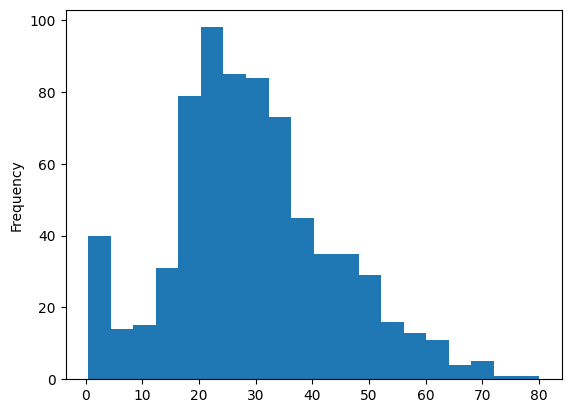

In [9]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

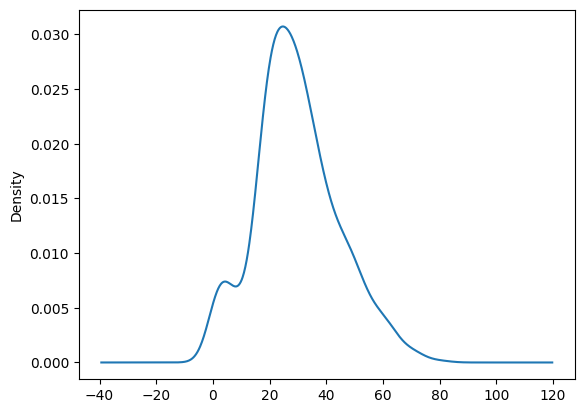

In [11]:
df['Age'].plot(kind='kde')

In [13]:
df['Age'].skew()

0.38910778230082704

<Axes: >

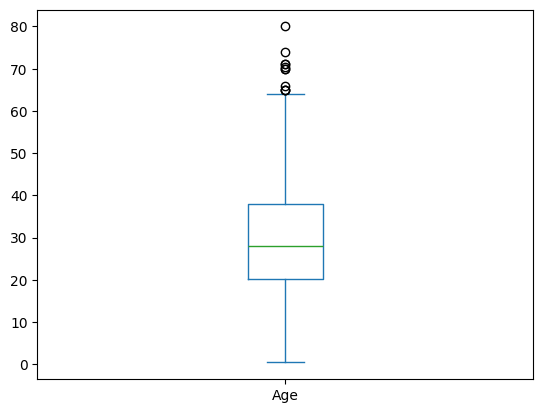

In [12]:
df['Age'].plot(kind='box')

To check outlier

In [14]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


No Outlier Found

In [15]:
df['Age'].isnull().sum()

177

Fare column
Conclusion
data is highly skewd
Fare col actually contains  the group fare and not indivisual fare(this might be and issue)
we need create column col called indivisual fare

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

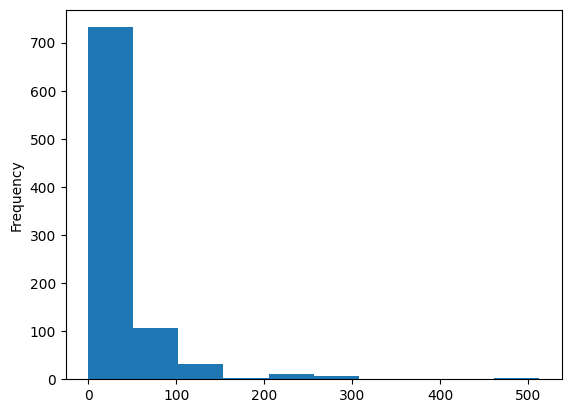

In [17]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

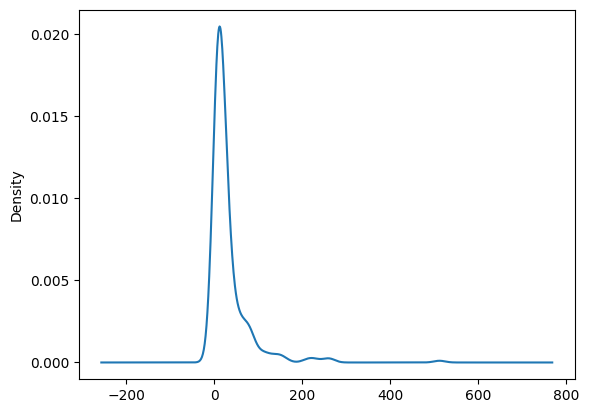

In [18]:
df['Fare'].plot(kind='kde')

In [19]:
df['Fare'].skew()

4.787316519674893

<Axes: >

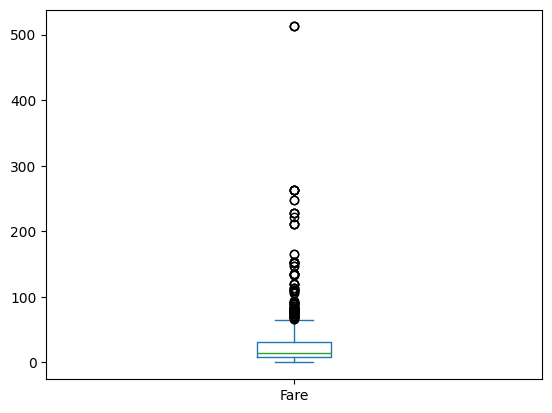

In [20]:
df['Fare'].plot(kind='box')

In [23]:
df[df["Fare"]>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


Univarient Analysis on Categorical Column

Servived Column

In [28]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

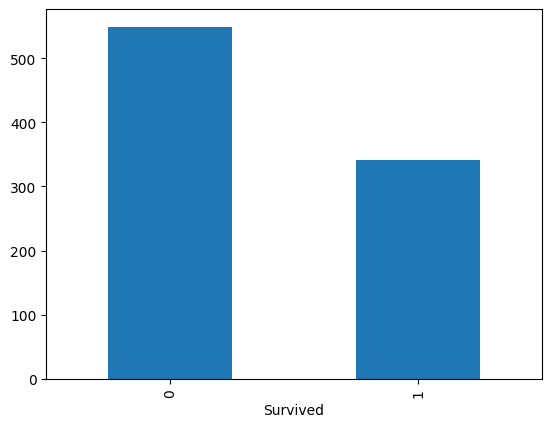

In [30]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

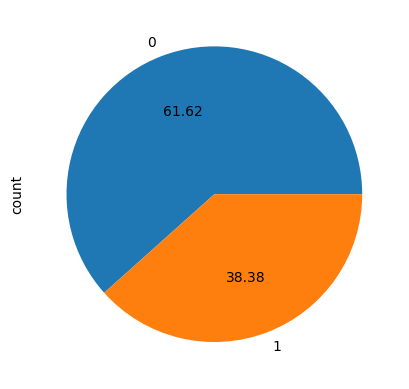

In [32]:
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

In [33]:
df['Survived'].isnull().sum()

0

Pclass Column Analysis
Conclusion 
To create a col to merge sibps and parch col called family
also create alone column because so many passenger travel alone

In [34]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

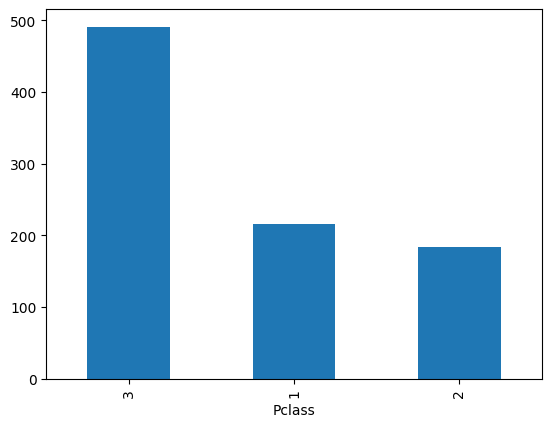

In [35]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

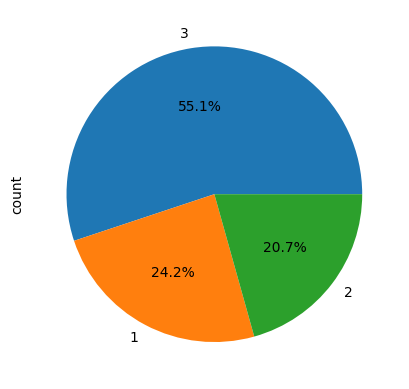

In [38]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.1f%%')

In [39]:
df['Pclass'].isnull().sum()

0

Sex Column Analysis

In [40]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

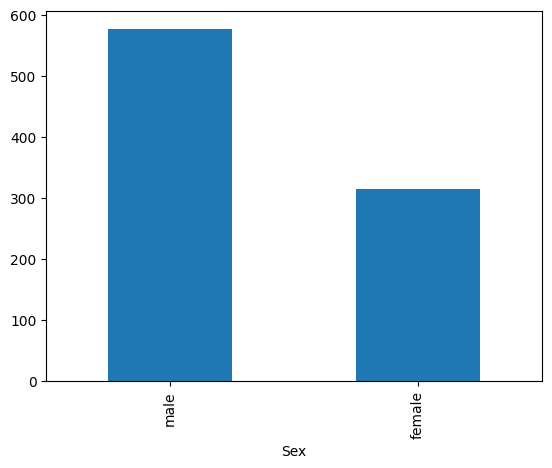

In [43]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

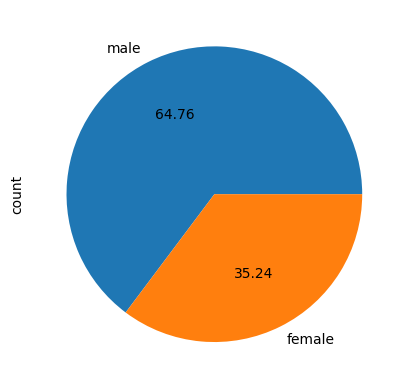

In [42]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

In [44]:
df['Sex'].isnull().sum()

0

In [45]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

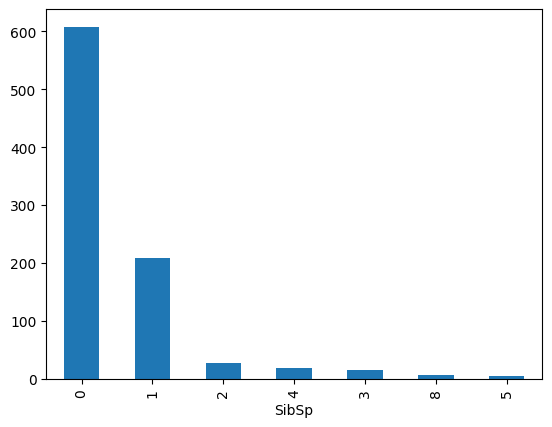

In [46]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

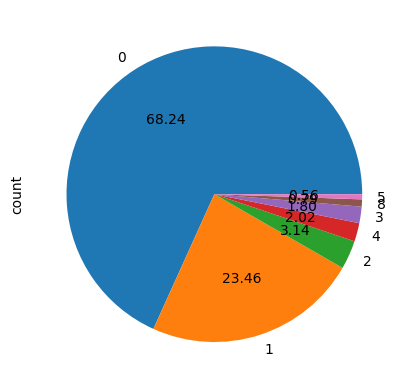

In [47]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%.2f')

In [48]:
df['SibSp'].isnull().sum()

0

In [49]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

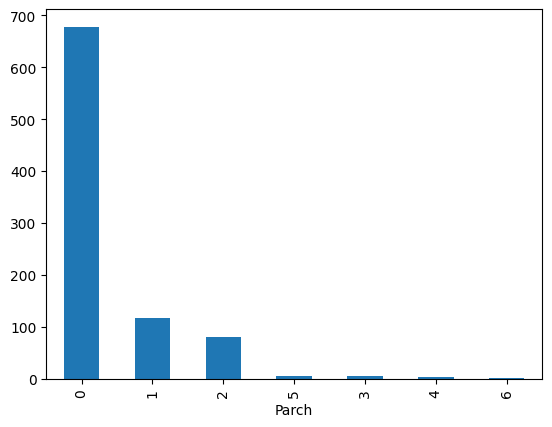

In [50]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

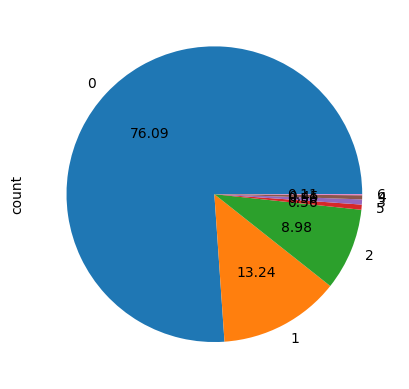

In [51]:
df['Parch'].value_counts().plot(kind='pie',autopct='%.2f')

In [52]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

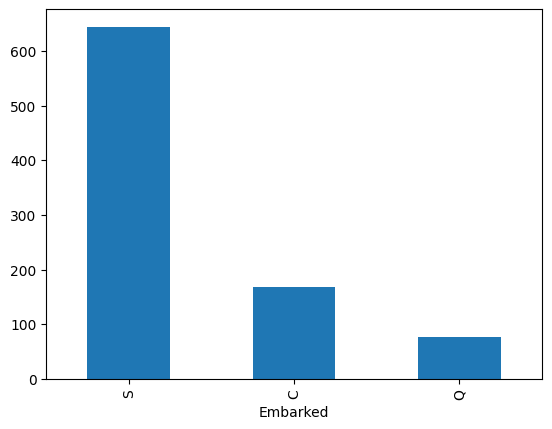

In [53]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

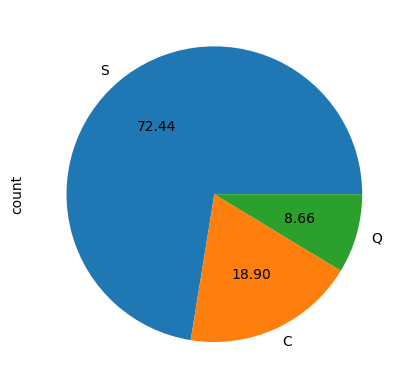

In [54]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

BiVarient Analysis 